<a href="https://colab.research.google.com/github/gantinamanikanta/project/blob/main/Yolo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("persons and vechicles travelling in road with huge traffic", limit=20, output_dir='images')

[%] Downloading Images to /content/images/persons and vechicles travelling in road with huge traffic


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://images.freeimages.com/images/premium/previews/8519/851916-heavy-traffic.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://thumbs.dreamstime.com/z/people-wait-impatiently-road-block-to-clear-tractor-trailer-overturns-highway-causing-severe-traffic-miles-massive-120450961.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/z/travelers-people-driving-car-road-traffic-jam-go-to-travelers-people-driving-car-road-traffic-jam-go-to-122210653.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://thumbs.dreamstime.com/b/heavy-traffic-cars-public-transport-wide-highway-road-city-center-331400688.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://image.shutterstock.com/shutterstock/photos/1165701511/display_1500/stock-photo-rear

In [ ]:


import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')



In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 220MB/s]


In [ ]:
result = results[0]
box = result.boxes[0]

In [ ]:
for result in results:
    boxes = result.boxes
    masks = result.masks
    probs = result.probs

In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [858.6812744140625, 313.73040771484375, 1011.47412109375, 399.146484375]
Probability: 0.6449211835861206


In [ ]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [859, 314, 1011, 399]
Probability: 0.64
---
Object type: car
Coordinates: [0, 349, 72, 442]
Probability: 0.63
---
Object type: car
Coordinates: [23, 308, 157, 400]
Probability: 0.62
---
Object type: car
Coordinates: [977, 285, 1025, 347]
Probability: 0.61
---
Object type: car
Coordinates: [172, 394, 330, 489]
Probability: 0.6
---
Object type: car
Coordinates: [90, 249, 240, 344]
Probability: 0.6
---
Object type: car
Coordinates: [864, 236, 995, 315]
Probability: 0.57
---
Object type: car
Coordinates: [31, 413, 174, 508]
Probability: 0.56
---
Object type: car
Coordinates: [209, 235, 367, 328]
Probability: 0.54
---
Object type: car
Coordinates: [0, 192, 106, 280]
Probability: 0.53
---
Object type: car
Coordinates: [878, 180, 1013, 253]
Probability: 0.53
---
Object type: car
Coordinates: [911, 413, 1025, 493]
Probability: 0.53
---
Object type: car
Coordinates: [164, 471, 325, 536]
Probability: 0.53
---
Object type: car
Coordinates: [195, 309, 326, 399]
Probab

In [ ]:
results1 = model.predict(source="https://media.wired.com/photos/593256b42a990b06268a9e21/191:100/w_1280,c_limit/traffic-jam-getty.jpg",
              save=True, conf=0.2,iou=0.5)
results2 = model.predict(source="https://images.freeimages.com/images/premium/previews/8519/851916-heavy-traffic.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]
Results = results2[0]


Found https://media.wired.com/photos/593256b42a990b06268a9e21/191:100/w_1280,c_limit/traffic-jam-getty.jpg locally at traffic-jam-getty.jpg
image 1/1 /content/traffic-jam-getty.jpg: 352x640 46 cars, 1018.0ms
Speed: 9.6ms preprocess, 1018.0ms inference, 3.1ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict

Found https://images.freeimages.com/images/premium/previews/8519/851916-heavy-traffic.jpg locally at 851916-heavy-traffic.jpg
image 1/1 /content/851916-heavy-traffic.jpg: 640x448 1 person, 39 cars, 2 motorcycles, 1 bus, 1187.0ms
Speed: 3.2ms preprocess, 1187.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


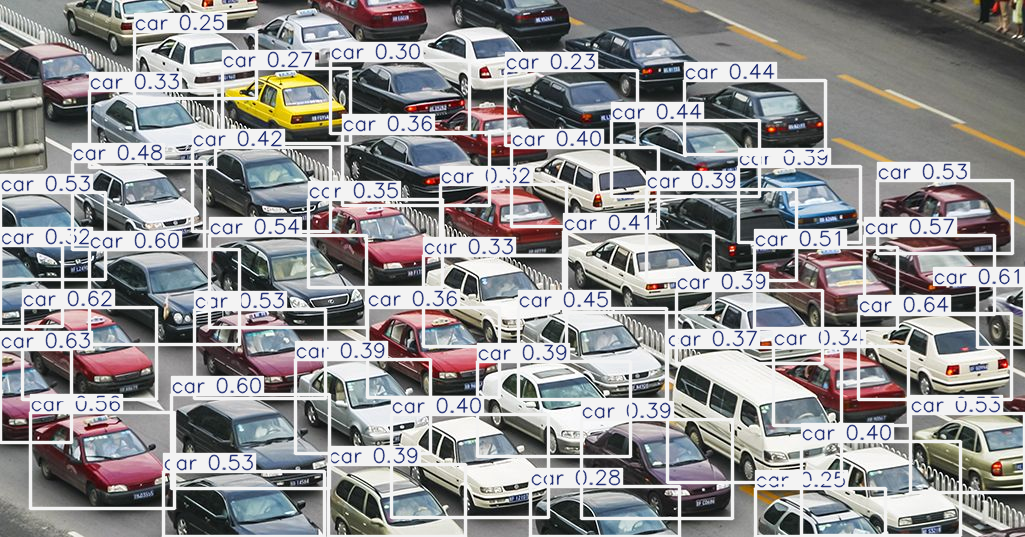

In [ ]:
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


